In [2]:
import pandas as pd

# Load the dataset you had before creating final_train_sample
df_full = pd.read_csv("../data/final_crop_dataset.csv")  # or .csv if that's what you saved

# Quick checks
print("Shape:", df_full.shape)
print("\nColumns:", df_full.columns.tolist())

# How many crops?
print("\nUnique Crops (labels):", df_full['label'].nunique())
print(df_full['label'].value_counts().head(20))  # top 20 crops with counts


Shape: (20684368, 14)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'State', 'District', 'Year', 'Month', 'Rainfall', 'Avg_Temp']

Unique Crops (labels): 22
label
watermelon     995761
mothbeans      984249
coconut        978104
kidneybeans    961980
apple          961672
blackgram      961253
coffee         956520
lentil         952014
mungbean       951726
grapes         947874
chickpea       946457
orange         946021
papaya         941460
cotton         940671
jute           939898
rice           930434
pigeonpeas     927130
muskmelon      926702
banana         914999
pomegranate    885575
Name: count, dtype: int64


In [3]:
# Check missing values
print(df_full.isna().sum())

# Quick stats
print(df_full.describe())


N                     0
P                     0
K                     0
temperature           0
humidity              0
ph                    0
rainfall              0
label                 0
State                 0
District              0
Year                  0
Month                 0
Rainfall             89
Avg_Temp       20684368
dtype: int64
                  N             P             K   temperature      humidity  \
count  2.068437e+07  2.068437e+07  2.068437e+07  2.068437e+07  2.068437e+07   
mean   5.053079e+01  5.342292e+01  4.834664e+01  2.559443e+01  7.150284e+01   
std    3.681966e+01  3.308507e+01  5.093070e+01  5.058314e+00  2.237705e+01   
min    0.000000e+00  5.000000e+00  5.000000e+00  8.825675e+00  1.425804e+01   
25%    2.100000e+01  2.800000e+01  2.000000e+01  2.271271e+01  6.039523e+01   
50%    3.700000e+01  5.100000e+01  3.200000e+01  2.560154e+01  8.053966e+01   
75%    8.500000e+01  6.800000e+01  4.800000e+01  2.853546e+01  8.999616e+01   
max    1.400000e+02

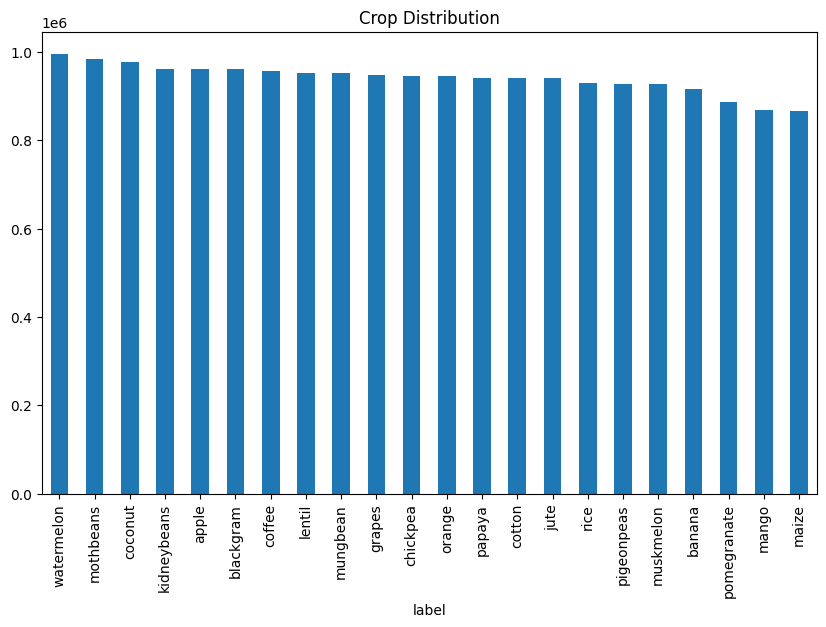

In [5]:
import matplotlib.pyplot as plt

df_full['label'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Crop Distribution")
plt.show()


In [8]:
#df_full = df_full.drop(columns=['Rainfall', 'Avg_Temp'])
print("After dropping columns, shape:", df_full.shape)


After dropping columns, shape: (20684368, 12)


In [15]:
df_balanced = (
    df_full.groupby('label', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 50000), random_state=42))
)

print(df_balanced['label'].value_counts())


label
apple          50000
banana         50000
blackgram      50000
chickpea       50000
coconut        50000
coffee         50000
cotton         50000
grapes         50000
jute           50000
kidneybeans    50000
lentil         50000
maize          50000
mango          50000
mothbeans      50000
mungbean       50000
muskmelon      50000
orange         50000
papaya         50000
pigeonpeas     50000
pomegranate    50000
rice           50000
watermelon     50000
Name: count, dtype: int64


C:\Users\usr\AppData\Local\Temp\ipykernel_14092\2275183821.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 50000), random_state=42))


In [16]:
df_balanced.to_parquet("../data/final_train_balanced.parquet")


In [17]:
print("\nBalanced Dataset Shape:", df_balanced.shape)
print(df_balanced['label'].value_counts())
df_balanced.to_parquet("../data/final_train_balanced.parquet")
print("\n✅ Final balanced dataset saved at '../data/final_train_balanced.parquet'")


Balanced Dataset Shape: (1100000, 12)
label
apple          50000
banana         50000
blackgram      50000
chickpea       50000
coconut        50000
coffee         50000
cotton         50000
grapes         50000
jute           50000
kidneybeans    50000
lentil         50000
maize          50000
mango          50000
mothbeans      50000
mungbean       50000
muskmelon      50000
orange         50000
papaya         50000
pigeonpeas     50000
pomegranate    50000
rice           50000
watermelon     50000
Name: count, dtype: int64

✅ Final balanced dataset saved at '../data/final_train_balanced.parquet'


In [22]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop(columns=['label'])
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print(X_train.head())


Train shape: (880000, 11)
Test shape: (220000, 11)
            N   P   K  temperature   humidity        ph    rainfall  \
18364435  107  36  21    25.292501  75.666533  6.205264   62.641742   
6600941    42  61  22    26.272744  62.288149  7.418651   70.232076   
397641     83  60  36    25.597049  80.145093  6.903986  200.834898   
4560430    20  67  19    19.244628  50.544953  5.671419  180.646528   
11135953   31  20  30    32.177520  54.013527  6.207496   91.887661   

                      State            District  Year  Month  
18364435             Kerala              Idukki  2025      6  
6600941              Odisha             Deogarh  2025      4  
397641    Arunachal Pradesh       Dibang Valley  2025      1  
4560430           Meghalaya  East Jaintia Hills  2025      2  
11135953  Arunachal Pradesh         East Kameng  2025      5  


In [1]:
from sklearn.preprocessing import OneHotEncoder


categorical_cols = ['State', 'District']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    index=X_test.index
)

# Drop categorical cols & join encoded
X_train = X_train.drop(columns=categorical_cols).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_cols).join(X_test_encoded)

print("Encoded Train shape:", X_train.shape)


NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


NameError: name 'X_train' is not defined

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Train again
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00     10000
      banana       1.00      1.00      1.00     10000
   blackgram       1.00      1.00      1.00     10000
    chickpea       1.00      1.00      1.00     10000
     coconut       1.00      1.00      1.00     10000
      coffee       1.00      1.00      1.00     10000
      cotton       1.00      1.00      1.00     10000
      grapes       1.00      1.00      1.00     10000
        jute       1.00      1.00      1.00     10000
 kidneybeans       1.00      1.00      1.00     10000
      lentil       1.00      1.00      1.00     10000
       maize       1.00      1.00      1.00     10000
       mango       1.00      1.00      1.00     10000
   mothbeans       1.00      1.00      1.00     10000
    mungbean       1.00      1.00      1.00     10000
   muskmelon       1.00      1.00      1.00     10000
      orange       1.00      1.00      1.00     10000
      papaya 

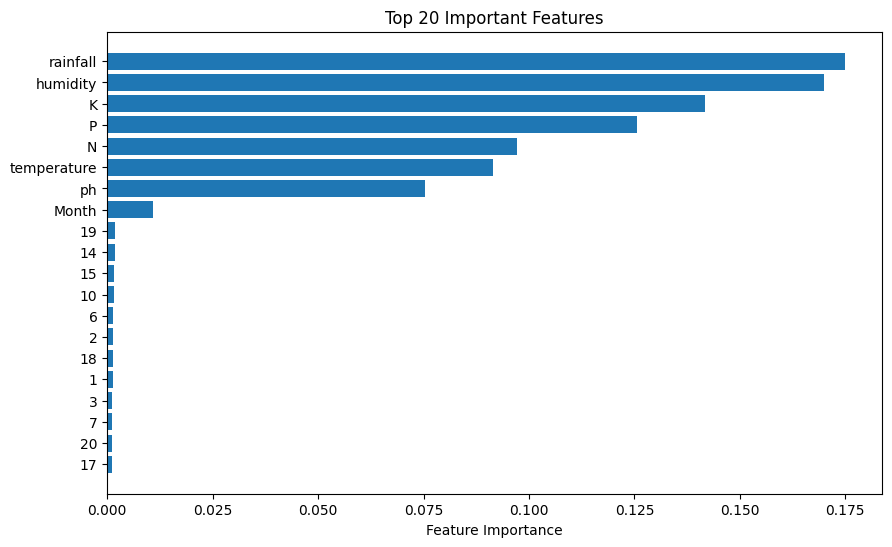

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



CV Accuracy scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


XGBoost model